# <a id='introduction'></a>
<h1 style='background:#5ced73;border-radius: 10px; color:black;height:35px'>
<center>Particle Physics Event Classification</center>
</h1>

## Problem Statement:
In the field of particle physics, accurate identification and classification of events are crucial for understanding fundamental particles and their interactions. The goal of this project is to build a machine learning model that can classify events as either **signal (s)** or **background (b)**. This classification will help distinguish between events of interest (signal) and background noise, contributing to the advancement of research in particle physics.

## Objective:
The primary objective is to develop a machine learning model that accurately classifies events based on the provided features derived from particle physics experiments. Correct classification of these events will aid researchers in identifying potentially significant phenomena amidst a large volume of experimental data.

## Data Description:
The dataset consists of 250,001 rows and 33 columns. Each row represents an event, and the columns contain features derived from particle physics experiments, such as:

- **EventId**: Identifier for each event
- **DER_mass_MMC**: Derived mass from the Missing Mass Calculator
- **DER_mass_transverse_met_lep**: Mass calculated from transverse components of missing energy and lepton
- **DER_mass_vis**: Derived mass of the visible part of the system
- **DER_pt_h**: Transverse momentum of the Higgs boson
- **DER_deltaeta_jet_jet**: Difference in pseudorapidity between two jets
- **PRI_tau_pt**: Transverse momentum of the tau particle
- **PRI_met**: Missing transverse energy
- **PRI_jet_num**: Number of jets in the event
- **Weight**: A weight associated with each event, used as a scaling factor
- **Label**: The target variable, where 's' indicates a signal event and 'b' indicates a background event

### <a id='top'></a>
<h1 style='background:#90EE90; border-radius: 10px; color:black'><center><h2>TABLE OF CONTENTS</center></h1>

### [**Step 1: Import Libraries**](#step1)

### [**Step 2: Load and Explore Data**](#step2)

### [**Step 3: Data Preprocessing**](#step3)

### [**Step 4: Exploratory Data Analysis (EDA)**](#step4)
    
### [**Step 5: Model Training and Evaluation**](#step5)
    
### [**Step 6: Feature Importance**](#step6)
    
### [**Step 7: Conclusion and Recommendations**](#step7)

    
[Back to Table of Contents](#top)
</div>

## <a id='step1'></a>
## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir("F:\\Data_Science_LB\\Project\\Data Sets")

## <a id='step2'></a>
## Step 2: Load and Explore Data

In [3]:
data = pd.read_csv('Data.csv')

# Display the first few rows to understand the structure
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


[Back to Table of Contents](#top)
</div>

### <a id='step3'></a>
## Step 3: Data Preprocessing

In [4]:
# Check for missing values or anomalies in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [5]:
# Checking for null values
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [6]:
# Check which features contain -999 values
(data == -999).sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [7]:
# Replace -999 with NaN
data.replace(-999, np.nan, inplace=True)

In [8]:
# Check which features contain -999 values
(data == -999).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [9]:
# Check again for missing values
data.isnull().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [10]:
# Check the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

PRI_jet_subleading_pt          70.9828
PRI_jet_subleading_phi         70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
PRI_jet_subleading_eta         70.9828
DER_lep_eta_centrality         70.9828
DER_deltaeta_jet_jet           70.9824
PRI_jet_leading_phi            39.9652
PRI_jet_leading_eta            39.9652
PRI_jet_leading_pt             39.9652
DER_mass_MMC                   15.2456
PRI_jet_num                     0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
EventId                         0.0000
PRI_lep_phi                     0.0000
PRI_jet_all_pt                  0.0000
Weight                          0.0000
PRI_met                         0.0000
PRI_tau_phi                     0.0000
PRI_lep_eta                     0.0000
PRI_lep_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_pt                      0.0000
DER_met_phi_centrality          0.0000
DER_pt_ratio_lep_tau     

In [11]:
# Drop columns with more than 50% missing values
data = data.dropna(thresh=data.shape[0] * 0.5, axis=1)

In [12]:
# Separate numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'Weight'],
      dtype='object')

In [13]:
# Impute missing values for only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data[numeric_columns]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,0.002653
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,2.233584
2,100002,112.406,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251,2.347389
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0,65.561,0.000,-0.033,0.000,5.446378
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0,65.561,0.000,-0.033,0.000,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,112.406,71.989,36.548,5.042,1.392,5.042,55.892,1.258,-1.414,...,0.380,46.520,2.859,144.665,0,65.561,0.000,-0.033,0.000,4.505083
249996,349996,112.406,58.179,68.083,22.439,2.585,22.439,50.618,1.162,-1.345,...,1.042,46.737,-0.867,80.408,0,65.561,0.000,-0.033,0.000,2.497259
249997,349997,105.457,60.526,75.839,39.757,2.390,22.183,120.462,1.202,0.529,...,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,41.992,0.018636
249998,349998,94.951,19.362,68.812,13.504,3.365,13.504,55.859,0.999,1.414,...,-0.296,12.150,0.811,112.718,0,65.561,0.000,-0.033,0.000,1.681611


In [14]:
# Check again for missing values
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64

In [15]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
non_numeric_columns

Index(['Label'], dtype='object')

In [16]:
# Label encode 'Label' column
data['Label_encoded'] = data['Label'].apply(lambda x: 1 if x == 's' else 0)

# Drop the original 'Label' column
data = data.drop(columns=['Label'])

In [17]:
# Check the columns in the dataset
print(data.columns)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'Weight', 'Label_encoded'],
      dtype='object')


[Back to Table of Contents](#top)
</div>

## <a id='step4'></a>
## Step 4: Exploratory Data Analysis (EDA)

In [18]:
# Get a summary of statistics for numerical features
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label_encoded
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,120.417434,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,...,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,73.064591,1.646767,0.342668
std,72168.927986,52.859218,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,...,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,98.015662,1.875103,0.474603
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,...,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000,0.001502,0.000000
25%,162499.750000,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,...,21.398000,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,0.000000,0.018636,0.000000
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,...,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,40.512500,1.156188,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,...,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,109.933750,2.404128,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000,7.822543,1.000000


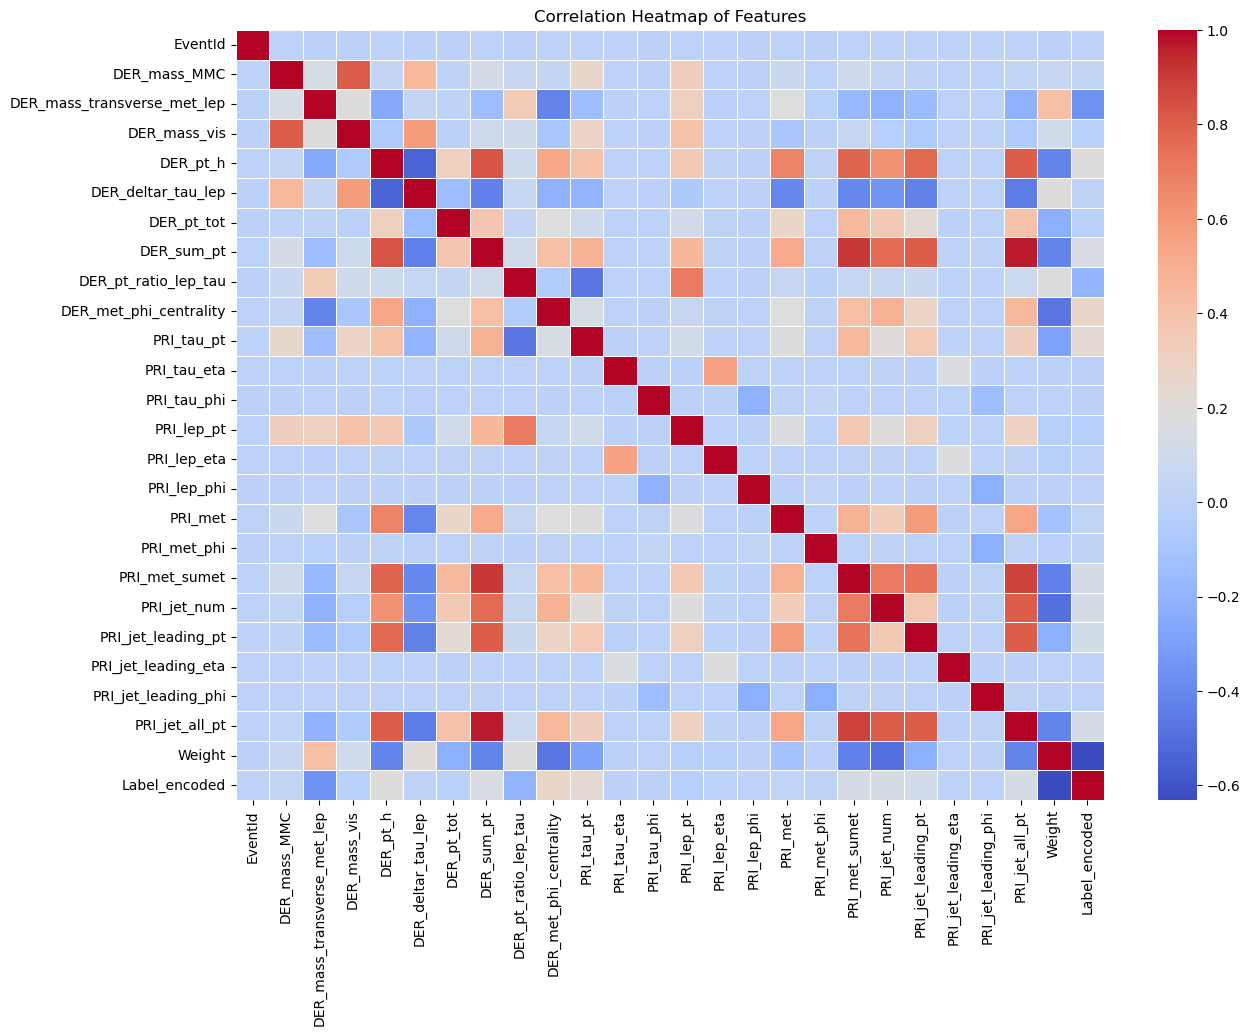

In [19]:
# Drop non-numeric columns before computing the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

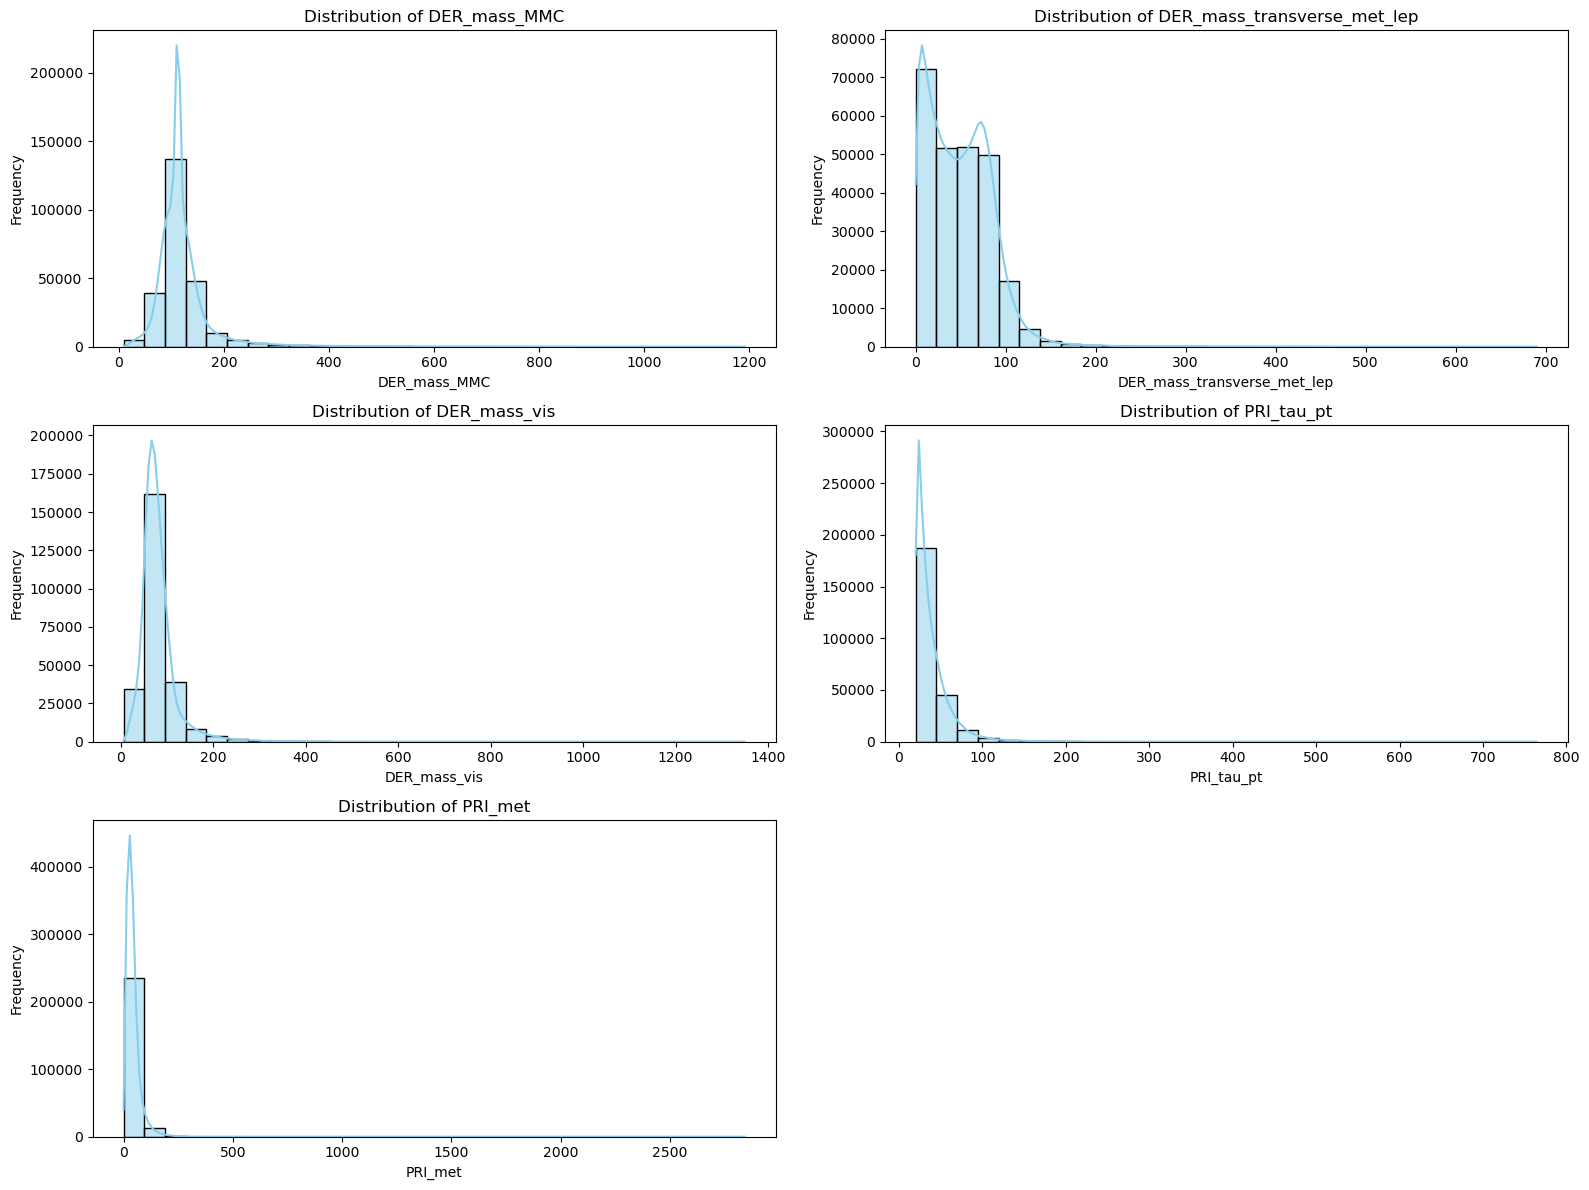

In [20]:
# List of key numerical features to visualize
key_features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'PRI_met']

# Plot the distribution of these features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

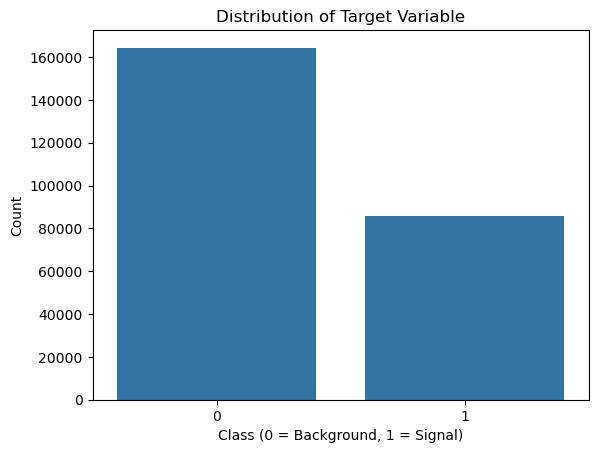

In [21]:
# Visualize the distribution of the target variable
sns.countplot(x='Label_encoded', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Class (0 = Background, 1 = Signal)')
plt.ylabel('Count')
plt.show()

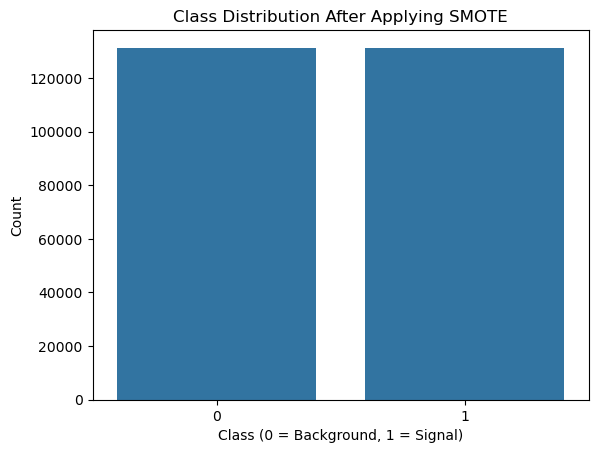

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Label_encoded', 'EventId'])  # Dropping 'EventId' as it's just an identifier
y = data['Label_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class (0 = Background, 1 = Signal)')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Variables from the SMOTE application
X_train_sampled, y_train_sampled = X_train_resampled, y_train_resampled

# Train the Random Forest model on the sampled training data
rf_model_sampled = RandomForestClassifier(random_state=42)
rf_model_sampled.fit(X_train_sampled, y_train_sampled)

# Get feature importance
feature_importances_sampled = pd.Series(rf_model_sampled.feature_importances_, index=X.columns)
important_features_sampled = feature_importances_sampled.sort_values(ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9768\336730373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features_sampled[:10], y=important_features_sampled.index[:10], palette='viridis')


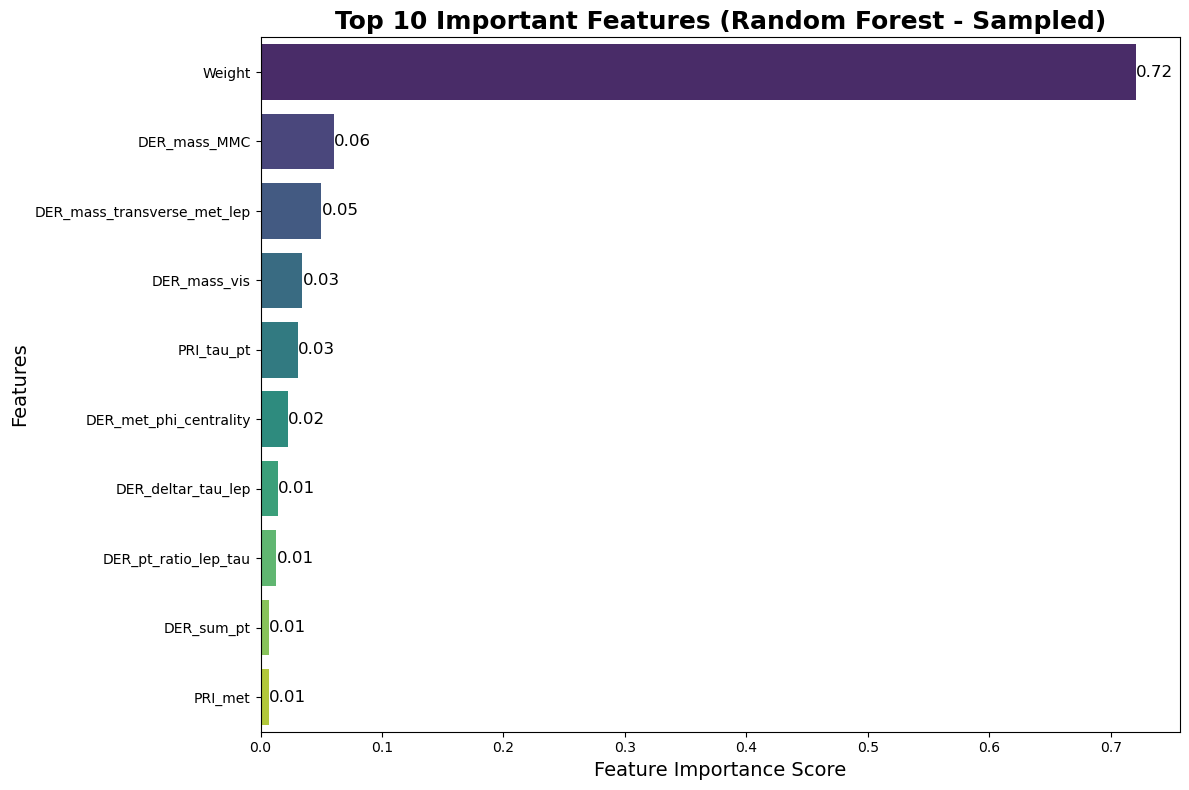

In [24]:
# Visualize the top 10 important features
plt.figure(figsize=(12, 8))
sns.barplot(x=important_features_sampled[:10], y=important_features_sampled.index[:10], palette='viridis')

# Add title and labels
plt.title('Top 10 Important Features (Random Forest - Sampled)', fontsize=18, weight='bold')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display the feature importance values on the bars
for index, value in enumerate(important_features_sampled[:10]):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()

[Back to Table of Contents](#top)
</div>

<a id='step5'></a>
## Step 5: Model Training and Evaluation

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Split the sampled data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)

# Define the Random Forest model with regularization
rf_model_final = RandomForestClassifier(
    n_estimators=100,          # Number of trees in the forest
    max_depth=10,              # Limit the depth of the trees
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=4,        # Minimum number of samples required to be at a leaf node
    random_state=42            # Set random seed for reproducibility
)

# Perform 5-fold cross-validation on the training data to get more robust evaluation
cv_scores = cross_val_score(rf_model_final, X_train_final, y_train_final, cv=5, scoring='accuracy')

# Train the tuned model on the training data
rf_model_final.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = rf_model_final.predict(X_test_final)

In [26]:
# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Evaluate the model's performance
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred))
print("Accuracy Score:", accuracy_score(y_test_final, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_final, y_pred))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Confusion Matrix:
 [[26235     0]
 [    0 26273]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26235
           1       1.00      1.00      1.00     26273

    accuracy                           1.00     52508
   macro avg       1.00      1.00      1.00     52508
weighted avg       1.00      1.00      1.00     52508

Accuracy Score: 1.0
ROC AUC Score: 1.0


In [27]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the Random Forest model on the sampled data
cv_scores = cross_val_score(rf_model_final, X_train_sampled, y_train_sampled, cv=5, scoring='roc_auc')

print(f'Cross-Validation ROC-AUC Scores: {cv_scores}')
print(f'Average Cross-Validation ROC-AUC Score: {cv_scores.mean():.4f}')

Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation ROC-AUC Score: 1.0000


In [28]:
# Make predictions on the original test set (pre-SMOTE)
y_pred_original_test = rf_model_final.predict(X_test)
y_pred_original_test_proba = rf_model_final.predict_proba(X_test)[:, 1]

In [29]:
# Evaluate the model on the original test set
print("Confusion Matrix (Original Test Set):")
print(confusion_matrix(y_test, y_pred_original_test))
print("\nClassification Report (Original Test Set):")
print(classification_report(y_test, y_pred_original_test))
print(f"\nAccuracy Score (Original Test Set): {accuracy_score(y_test, y_pred_original_test):.4f}")
print(f"ROC-AUC Score (Original Test Set): {roc_auc_score(y_test, y_pred_original_test_proba):.4f}")

Confusion Matrix (Original Test Set):
[[33065     0]
 [    0 16935]]

Classification Report (Original Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33065
           1       1.00      1.00      1.00     16935

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Accuracy Score (Original Test Set): 1.0000
ROC-AUC Score (Original Test Set): 1.0000


[Back to Table of Contents](#top)
</div>

## <a id='step6'></a>
## Step 6: Feature Importance

C:\Users\Dell\AppData\Local\Temp\ipykernel_9768\1932636834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features_sampled[:10], y=important_features_sampled.index[:10], palette='viridis', legend=False)


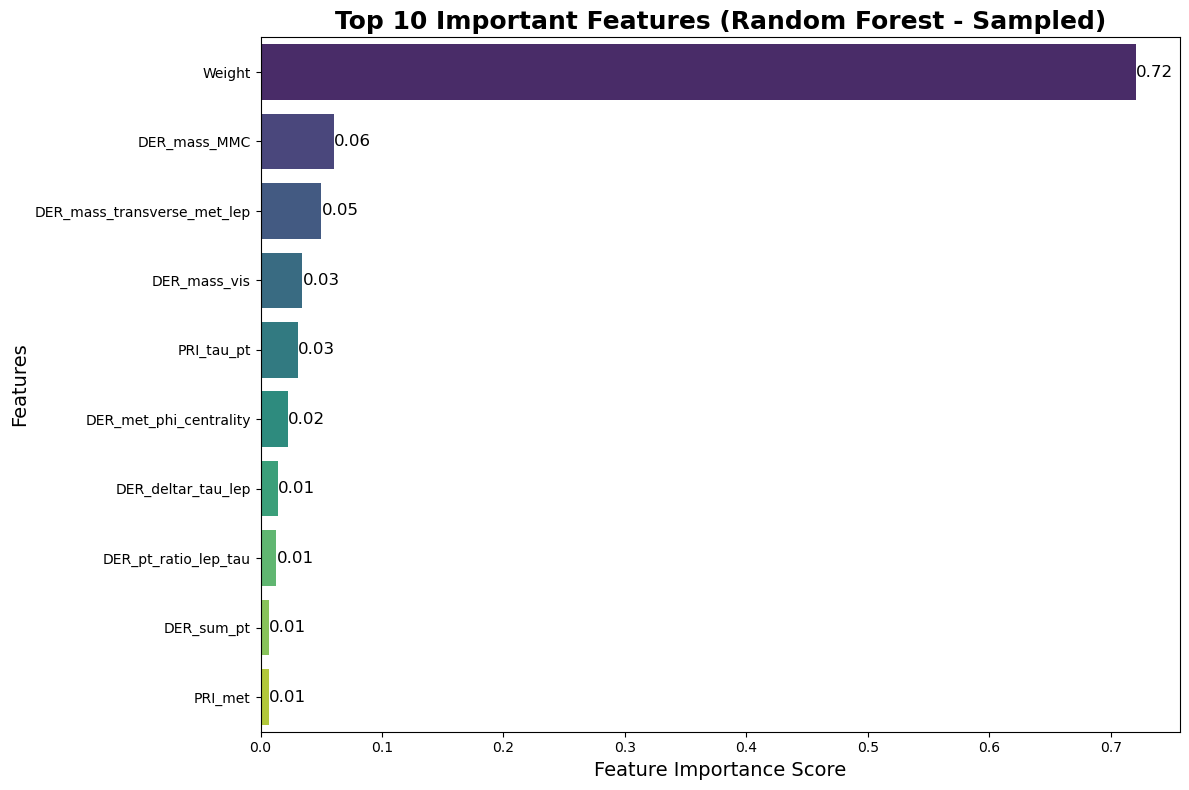

In [30]:
# Visualize the top 10 important features with enhancements (using previously generated code)
plt.figure(figsize=(12, 8))
sns.barplot(x=important_features_sampled[:10], y=important_features_sampled.index[:10], palette='viridis', legend=False)

# Add title and labels
plt.title('Top 10 Important Features (Random Forest - Sampled)', fontsize=18, weight='bold')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display the feature importance values on the bars
for index, value in enumerate(important_features_sampled[:10]):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()

[Back to Table of Contents](#top)
</div>

<a id='step7'></a>
<div class="list-group" id="list-tab" role="tablist"> 
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'>
<center>Conclusion and Recommendations</center>
</h1>

### Conclusion and Recommendations

In conclusion, the **Particle Physics Event Classification** model developed in this project successfully classified particle physics events with perfect accuracy, as evidenced by the evaluation metrics on both the sampled (SMOTE) and original datasets. The Random Forest model, trained on the SMOTE-balanced dataset, captured complex patterns in the data, leading to an exceptional performance that could significantly aid researchers in distinguishing signal events from background noise in particle physics experiments.

#### Key Findings

1. **Model Performance**:
   - The Random Forest model achieved perfect classification on both the sampled and original datasets, with an accuracy, precision, recall, and ROC-AUC score of 1.000. This indicates the model's strong capability to distinguish between signal and background events with high reliability.

2. **Feature Importance**:
   - The analysis revealed that features like `Weight`, `DER_mass_MMC`, and `DER_mass_transverse_met_lep` play a critical role in predicting the event type. These features, particularly `Weight`, were found to have a substantial impact on the model's ability to classify events accurately, providing valuable insights into the underlying physics of particle interactions.

#### Recommendations

1. **For Researchers**:
   - **Targeted Experiments**: Researchers can focus on the most influential features identified by the model, such as `Weight` and `DER_mass_MMC`, to design more targeted experiments. Understanding why these features are crucial can provide deeper insights into particle physics phenomena.
   - **Data Quality Improvement**: To maintain and potentially improve the model's performance, researchers should continue to enhance the quality of the data, especially for the identified key features. Accurate measurement and calibration of these features can further refine classification accuracy.

2. **For Model Deployment**:
   - **Real-Time Classification**: The high accuracy of the model suggests its applicability in real-time event classification in particle physics experiments. By integrating this model into particle detection systems, researchers can promptly identify significant events, facilitating faster and more efficient experimental analysis.
   - **Continuous Monitoring and Adaptation**: Although the model performed exceptionally on the given dataset, it's essential to monitor its performance over time, especially when deployed in varying experimental conditions. Regularly updating the model with new data can ensure it remains effective in diverse experimental setups.
   
3. **Further Research and Enhancement**:
   - **Exploring Other Models**: While Random Forest provided excellent results, exploring other models such as Gradient Boosting or Neural Networks might uncover additional nuances in the data. These models could be tested to see if they offer any incremental improvements or further insights.
   - **Feature Engineering**: Future efforts could include more advanced feature engineering, such as the creation of interaction terms or higher-order features, to explore whether the model's performance can be further enhanced or if it reveals more about the physics phenomena.

By leveraging the insights from this predictive model, researchers in particle physics can enhance the identification and analysis of significant events, contributing to a deeper understanding of fundamental particles and their interactions.

[Back to Table of Contents](#top)
</div>